In [12]:
import json
import random
import matplotlib.pyplot as plt

In [2]:
REVIEW_PATH = "../data/yelp_academic_dataset_review.json"

def read_data(limit: int) -> list:
    lengths = []
    with open(REVIEW_PATH) as f:
        for idx, line in enumerate(f):
            if idx >= limit:
                break
            lengths.append(len(json.loads(line)["text"]))

    # lengths = np.array([[l] for l in lengths])
    return lengths

lengths = read_data(1000)

In [15]:
def shift_mode(point, data, h):
    weights = [0 if abs(point - x) > h else 1 for x in data]
    weighted_sum = sum([data[i] * weights[i] for i in range(len(data))])
    total_weights = sum(weights)

    if total_weights != 0:
        return weighted_sum / total_weights
    else:
        return point

def mean_shift(data, h, threshold: float = 1e-5):

    mode = [[] for _ in range(len(data))]
    for i in range(len(data)):
        m = 0
        mode[i].append(data[i])
        while True:
            mode[i].append(shift_mode(mode[i][m], data, h))
            m += 1
            if abs(mode[i][m] - mode[i][m-1]) < threshold:
                break
        mode[i][0] = mode[i][m]

    C = []
    for i in range(len(data)):
        if mode[i][0] not in C:
            C.append(mode[i][0])

    labels = []
    for point in data:
        distances = [abs(point - c) for c in C]
        label = distances.index(min(distances))
        labels.append(label)

    return C, labels

In [21]:
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

In [30]:
def plot(ax, data, labels):
	prop_cycle = plt.rcParams['axes.prop_cycle']
	colors = prop_cycle.by_key()['color']


	for i, cluster in enumerate(labels):
		ax.scatter(data[i], [cluster], c=colors[int(cluster)], label=f'Cluster {cluster+1}')
		# plt.show()

h = 300, number of clusters = 8
h = 500, number of clusters = 3
h = 700, number of clusters = 2
h = 1000, number of clusters = 2
h = 1500, number of clusters = 1
h = 2000, number of clusters = 1


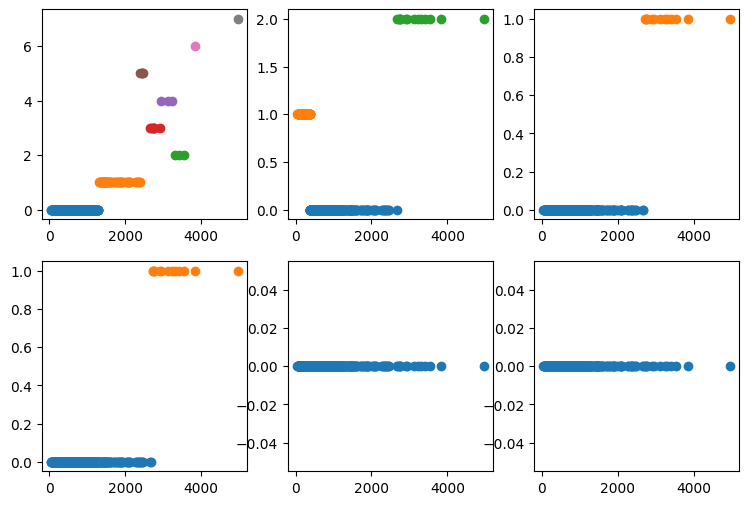

In [35]:
bandwidths = [300, 500, 700, 1000, 1500, 2000]
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(9, 6))

for ax, h in zip(axes.ravel(), bandwidths):
	centroids, labels = mean_shift(lengths, h, 0.001)
	print(f"h = {h}, number of clusters =", len(centroids))
	if len(centroids) <= len(colors):
		plot(ax, lengths, labels)

plt.show()